# Bike Sharing Assignment - BoomBikes.

Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario . In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

**The company wants to know:**

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.

**Business Goal:**

- Develop a model to find the variables which are significant the demand for shared bikes with the available independent variables.

- It will be used by the management to understand and manipulate the business strategy to meet the demand levels and meet the customer's expectations.

# Importing Libraries

In [1]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# Data Reading

In [2]:
bikes = pd.read_csv('day.csv')
bikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


# Data Understanding

In [3]:
# Checking data types
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Inspecting the shape of the dataset
bikes.shape

(730, 16)

In [5]:
# Inspecting the dimensions of the dataset
bikes.ndim

2

In [6]:
# Inspecting columns of the dataset
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# Inspecting size of the dataset
bikes.size

11680

In [8]:
# Inspecting the numeriacl data
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
# Inspecting for null values
bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Observations :**
- There are 730 rows and 16 columns in the data set. 
- There are no null values in any of the columns.

# EDA and Data Cleaning

**Identifying the target variable and removing variables which cannot contribute to our Model :**

- Since we are trying to find the independent predictors for the total number of bookings each day. The 'cnt' variable is the one which captures this value according to the data dictionary. So 'cnt' will be our target varaible. 'registered' and 'casual' are just the type of users who booked on a given day which are type of Traget Varaible, and hence can be removed before feeding them into our model.



- 'instant' is just a row instance identifier.



- 'dteday' can be removed as we have some of the date features like 'mnth' and 'year' and 'weekday' already in other columns.

In [10]:
# Removing 'registered' and 'casual' columns.
bikes=bikes.drop(['registered','casual'],axis=1)

In [11]:
# Cross - verifying.
bikes.shape

(730, 14)

In [12]:
bikes.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


In [13]:
# Removing 'instant' and 'dteday' columns.
bikes=bikes.drop(['instant','dteday'],axis=1)

In [14]:
# Cross - verifying.
bikes.shape

(730, 12)

In [15]:
bikes.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
5,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,1606
6,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,1510
7,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,959
8,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,822
9,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,1321


**From the data dictionary, it's clear that the following variables are categorical.**

season : season (spring - 1, summer - 2, fall - 3, winter - 4)

mnth : month (1 to 12).

weekday : day of the week.

weathersit :

  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy.
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist.
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds.
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

We need to replace the numeric values with appropriate String Values as they are not continuous variables.

**Updating values of 'season' variable**

In [16]:
# checking the unique values in the 'season' column
bikes['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [17]:
# replacing seasons values 1,2,3,4 with 'spring','summer','fall','winter' respectively.
# creating a dictionary to map the values.
seasons = {1:'spring',2:'summer',3:'fall',4:'winter'}

In [18]:
# updating the values in the 'season' column with season names
bikes['season'] = bikes['season'].apply(lambda x : seasons[x])

In [19]:
# checking the values in 'season' column.
bikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

**Updating values of 'month' variable**

In [20]:
#checking the unique values in the 'mnth' column.
bikes['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [21]:
#replacing 'mnth' values 1,2,3,4,5,6,7,8,9,10,11,12 with corresponding month names.
#creating a dictionary to map the values.
months = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

In [22]:
#updating the values in the 'month' column with corresponding month names.
bikes['mnth'] = bikes['mnth'].apply(lambda x : months[x])

In [23]:
#checking the values in 'mnth' column.
bikes['mnth'].value_counts()

Mar    62
Dec    62
Jan    62
Aug    62
Jul    62
May    62
Oct    62
Sep    60
Apr    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64

**Updating values of 'weekday' variable**

In [24]:
#checking the unique values in the 'weekday' column.
bikes['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [25]:
#replacing 'weekday' values 0,1,2,3,4,5,6 with corresponding day names.
#creating a dictionary to map the values.
weekdays = {0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'}

In [26]:
#updating the values in the 'weekday' column with corresponding day names.
bikes['weekday'] = bikes['weekday'].apply(lambda x : weekdays[x])

In [27]:
#checking the values in 'weekday' column.
bikes['weekday'].value_counts()

Sun    105
Sat    105
Mon    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64

**Updating values of 'weathersit' variable**

In [28]:
#checking the unique values in the 'weathersit' column.
bikes['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [29]:
#replacing 'weathersit' values 1,2,3 with 'pleasant','moderate','bad' respectively.
#creating a dictionary to map the values.
weather = {1:'pleasant',2:'moderate',3:'bad'}

In [30]:
#updating the values in the 'weathersit' column with corresponding weather classes.
bikes['weathersit'] = bikes['weathersit'].apply(lambda x : weather[x])

In [31]:
#checking the values in 'weekday' column.
bikes['weathersit'].value_counts()

pleasant    463
moderate    246
bad          21
Name: weathersit, dtype: int64

In [32]:
# Let us cross-verify all at once that we replaced the numeric values with appropriate String Values as they are not continuous variables.
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,pleasant,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,pleasant,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,pleasant,9.305237,11.46350,43.6957,12.522300,1600


# Data Visualization

**Visualizing the trend among the numeric variables using seaborn pairplot.**

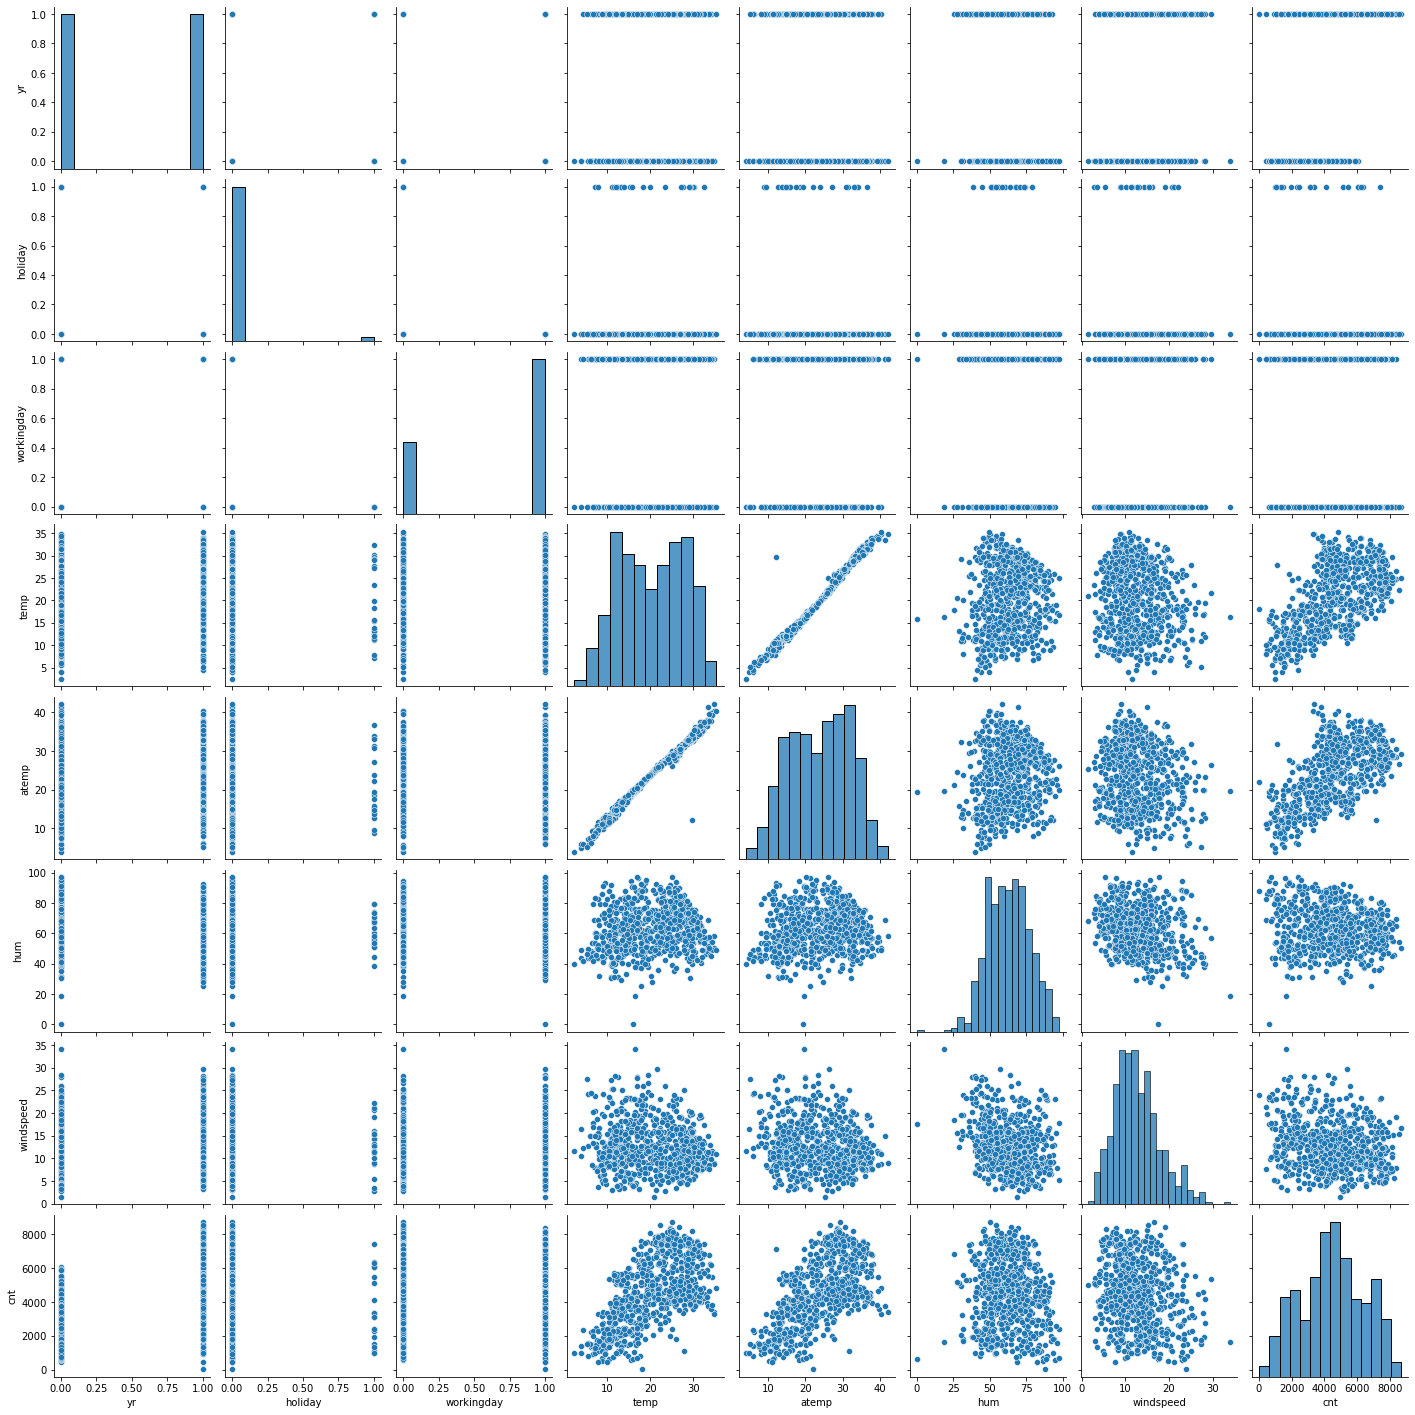

In [33]:
sns.pairplot(bikes)
plt.show()

## Observations :
- The temp and atemp have considerable positive correlation with cnt.
- There's no much linear relationship between hum, windspeed with cnt.
- Also, the variables temp and atemp are highly correlated as the scatter plot almost forms a straigt line. These variables cannot be fed together into our model.
- Since temp and atemp are highly correlated and they actually represent actual temperature and feeling temperaute respesctively, we can get rid of temp and keep the feeling temperature to avoid multicollinearaty

In [34]:
#removing the temp variable from the dataset.
bikes.drop(['temp'],axis=1,inplace=True)

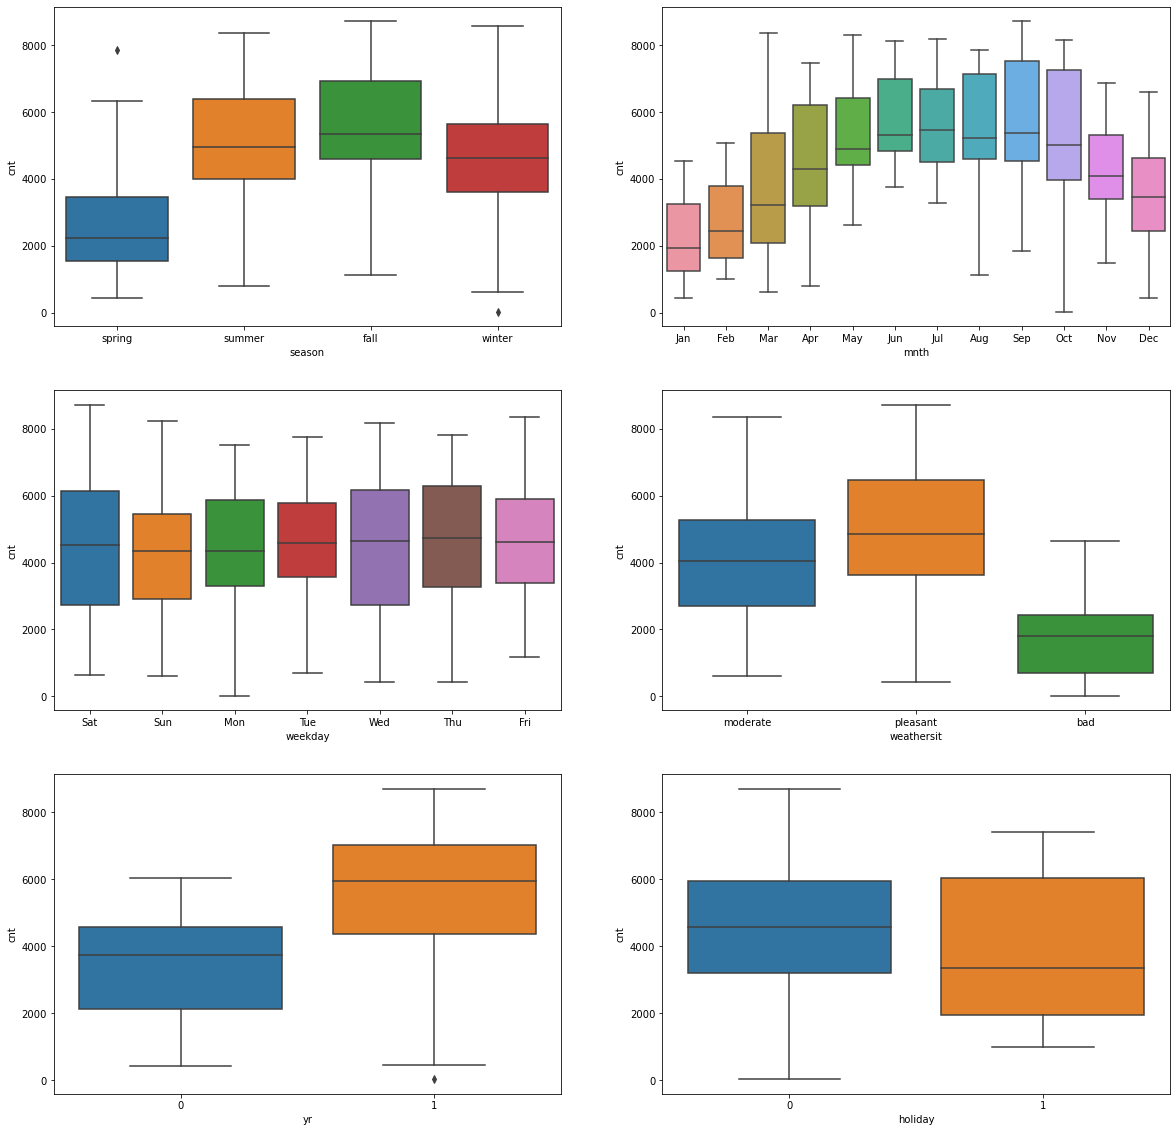

In [35]:
#Visualizing Categorical Data.

plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(3,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.show()

## Observations :
- There are more number of bookings in Fall season, followed by Summer and Winter. The Spring season has not as many bookings.
- The months of May, June, July, August, September and October have the highest number of bookings among the months.
- There's no much affect of weekday on the number of bookings.
- Pleasant weather and Moderate weather are among the choices of most of the people to book a bike. Bad weather as expected has least bookings overall, but it's not 0.
- Although there's no big difference in the range of bookings on holidays and non-holidays, Working days have more demand with minimumn bookings of 3k+ and a median of ~4.5k.
- The year 2019 has recorded significantly high number of bookings when compared to 2018.

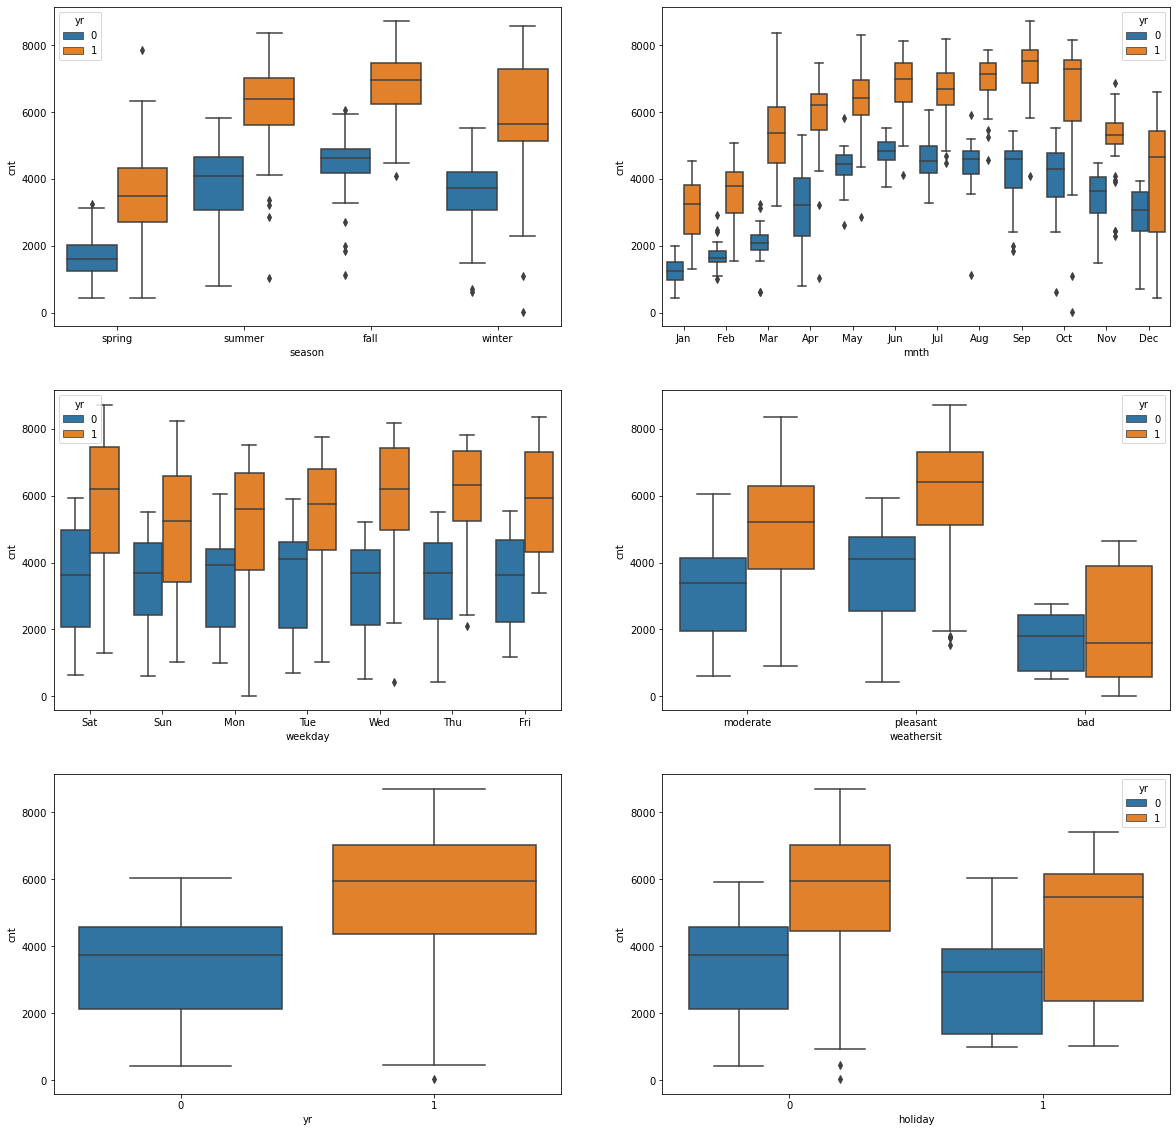

In [36]:
# checking if the trends change across 2018 and 2019

plt.figure(figsize=(20, 20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes,hue='yr')
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes,hue='yr')
plt.subplot(3,2,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes,hue='yr')
plt.subplot(3,2,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes,hue='yr')
plt.subplot(3,2,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,2,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes,hue='yr')
plt.show()

**Observations :**

There is no big difference when comparing different attributes across 2 different years. The year 2018 has got still less number of bookings as we saw above.

# Data Preparation

- There are categorical variables in our dataset which need to be converted to numerical values to fit a regression line.
- Let's convert them into 0s and 1s.

**NOTE : The categorical variables with just 2 categories can be converted into 0s and 1s. However, those with more than 2 categories need to be converted into dummy variables.**

In [37]:
#listing all the columns
bikes.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [38]:
# categorical variables with just 2 categories
bikes[['yr','holiday','workingday']]

,yr,holiday,workingday
0,0,0,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
725,1,0,1
726,1,0,1
727,1,0,0
728,1,0,0


In [39]:
#printing the unique values in these columns
print(bikes.yr.value_counts())
print(bikes.holiday.value_counts())
print(bikes.workingday.value_counts())

1    365
0    365
Name: yr, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64


**Since all the categorical variables with just 2 categories already have 0s and 1s, we can proceed as is.**

In [40]:
# Categorical variables with more than 2 categories.
bikes[['season','weekday','mnth','weathersit']]

,season,weekday,mnth,weathersit
0,spring,Sat,Jan,moderate
1,spring,Sun,Jan,moderate
2,spring,Mon,Jan,pleasant
3,spring,Tue,Jan,pleasant
4,spring,Wed,Jan,pleasant
...,...,...,...,...
725,spring,Thu,Dec,moderate
726,spring,Fri,Dec,moderate
727,spring,Sat,Dec,moderate
728,spring,Sun,Dec,pleasant


In [41]:
#printing the unique values in these columns
print(bikes.season.value_counts())
print(bikes.weekday.value_counts())
print(bikes.mnth.value_counts())
print(bikes.weathersit.value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
Sun    105
Sat    105
Mon    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: weekday, dtype: int64
Mar    62
Dec    62
Jan    62
Aug    62
Jul    62
May    62
Oct    62
Sep    60
Apr    60
Nov    60
Jun    60
Feb    56
Name: mnth, dtype: int64
pleasant    463
moderate    246
bad          21
Name: weathersit, dtype: int64


## Creating Dummy Variables

**1) Season**

In [42]:
#creating dummy variables for 'season' and storing in a new dataframe 
SEASON = pd.get_dummies(bikes['season'])

In [43]:
#checking a sample of the data

SEASON.sample(20)

,fall,spring,summer,winter
261,1,0,0,0
699,0,0,0,1
305,0,0,0,1
256,1,0,0,0
159,0,0,1,0
194,1,0,0,0
413,0,1,0,0
208,1,0,0,0
611,1,0,0,0
548,1,0,0,0


- 1000 - represents fall

- 0100 - represents spring

- 0010 - represents summer

- 0001 - represents winter

**Concatenating the main dataframe and the SEASON dataframe.**

In [44]:
bikes = pd.concat([bikes,SEASON],axis=1)

In [45]:
#getting a random sample from bikes to check if the dummy variables show the correct data
bikes.sample(20)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,summer,winter
98,summer,0,Apr,0,Sat,0,moderate,17.07645,87.7500,8.916561,2455,0,0,1,0
672,winter,1,Nov,0,Sun,0,pleasant,16.47690,53.2917,12.000236,5107,0,0,0,1
686,winter,1,Nov,0,Sun,0,pleasant,16.88730,69.2917,15.250004,4669,0,0,0,1
245,fall,0,Sep,0,Sat,0,pleasant,31.66065,71.6667,12.416775,4484,1,0,0,0
707,winter,1,Dec,0,Sun,0,moderate,19.50730,90.5417,10.584325,3228,0,0,0,1
703,winter,1,Dec,0,Wed,1,pleasant,21.40060,48.5000,21.709407,5729,0,0,0,1
163,summer,0,Jun,0,Mon,1,pleasant,30.08270,49.4583,20.458450,5020,0,0,1,0
491,summer,1,May,0,Mon,1,moderate,26.35710,66.4167,15.458307,6273,0,0,1,0
283,winter,0,Oct,0,Tue,1,moderate,27.30480,80.8750,9.583814,4563,0,0,0,1
266,winter,0,Sep,0,Sat,0,moderate,28.22060,86.2500,5.251681,5423,0,0,0,1


In [46]:
#dropping the season column which is categorical as we have created the dummy variables successfully
bikes.drop(['season'],axis=1,inplace=True)

In [47]:
bikes.head(10)

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,summer,winter
0,0,Jan,0,Sat,0,moderate,18.18125,80.5833,10.749882,985,0,1,0,0
1,0,Jan,0,Sun,0,moderate,17.68695,69.6087,16.652113,801,0,1,0,0
2,0,Jan,0,Mon,1,pleasant,9.47025,43.7273,16.636703,1349,0,1,0,0
3,0,Jan,0,Tue,1,pleasant,10.60610,59.0435,10.739832,1562,0,1,0,0
4,0,Jan,0,Wed,1,pleasant,11.46350,43.6957,12.522300,1600,0,1,0,0
5,0,Jan,0,Thu,1,pleasant,11.66045,51.8261,6.000868,1606,0,1,0,0
6,0,Jan,0,Fri,1,moderate,10.44195,49.8696,11.304642,1510,0,1,0,0
7,0,Jan,0,Sat,0,moderate,8.11270,53.5833,17.875868,959,0,1,0,0
8,0,Jan,0,Sun,0,pleasant,5.80875,43.4167,24.250650,822,0,1,0,0
9,0,Jan,0,Mon,1,pleasant,7.54440,48.2917,14.958889,1321,0,1,0,0


In [48]:
#checking the shape of the data
bikes.shape

(730, 14)

**2) Weekday**

In [49]:
#creating dummy variables for 'weekday' and storing in a new dataframe.
WEEKDAY = pd.get_dummies(bikes['weekday'])

In [50]:
#checking a sample of the data.
WEEKDAY.sample(20)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
570,0,0,0,0,0,0,1
221,0,0,0,0,0,0,1
177,0,1,0,0,0,0,0
145,0,0,0,0,1,0,0
69,1,0,0,0,0,0,0
300,1,0,0,0,0,0,0
170,0,1,0,0,0,0,0
231,0,0,1,0,0,0,0
303,0,1,0,0,0,0,0
582,0,1,0,0,0,0,0


**Concatenating the main dataframe and the WEEKDAY dataframe.**

In [51]:
bikes = pd.concat([bikes,WEEKDAY],axis=1)

In [52]:
#getting a random sample from bikes to check if the dummy variables show the correct data
bikes.sample(20)

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,...,spring,summer,winter,Fri,Mon,Sat,Sun,Thu,Tue,Wed
630,1,Sep,0,Sun,0,pleasant,25.94665,46.7083,14.958286,7907,...,0,0,1,0,0,0,1,0,0,0
2,0,Jan,0,Mon,1,pleasant,9.47025,43.7273,16.636703,1349,...,1,0,0,0,1,0,0,0,0,0
96,0,Apr,0,Thu,1,pleasant,21.68480,60.2917,10.874904,3141,...,0,1,0,0,0,0,0,1,0,0
30,0,Jan,0,Mon,1,moderate,9.31250,60.3750,12.541864,1501,...,1,0,0,0,1,0,0,0,0,0
440,1,Mar,0,Sat,0,moderate,25.25230,75.5833,7.417168,7836,...,1,0,0,0,0,1,0,0,0,0
68,0,Mar,0,Thu,1,bad,19.28340,0.0000,17.545759,623,...,1,0,0,0,0,0,0,1,0,0
418,1,Feb,0,Thu,1,pleasant,22.22230,55.4583,12.791171,5062,...,1,0,0,0,0,0,0,1,0,0
392,1,Jan,0,Sat,0,pleasant,16.31895,54.3333,14.125543,4023,...,1,0,0,0,0,1,0,0,0,0
363,0,Dec,0,Fri,1,pleasant,15.94060,63.6667,9.000579,2999,...,1,0,0,1,0,0,0,0,0,0
610,1,Sep,1,Mon,0,pleasant,33.08145,79.0833,10.125107,6034,...,0,0,0,0,1,0,0,0,0,0


In [53]:
#dropping the weekday column which is categorical as we have created the dummy variables successfully
bikes.drop(['weekday'],axis=1,inplace=True)

In [54]:
bikes.head(10)

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,summer,winter,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,Jan,0,0,moderate,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0,0,0
1,0,Jan,0,0,moderate,17.68695,69.6087,16.652113,801,0,1,0,0,0,0,0,1,0,0,0
2,0,Jan,0,1,pleasant,9.47025,43.7273,16.636703,1349,0,1,0,0,0,1,0,0,0,0,0
3,0,Jan,0,1,pleasant,10.60610,59.0435,10.739832,1562,0,1,0,0,0,0,0,0,0,1,0
4,0,Jan,0,1,pleasant,11.46350,43.6957,12.522300,1600,0,1,0,0,0,0,0,0,0,0,1
5,0,Jan,0,1,pleasant,11.66045,51.8261,6.000868,1606,0,1,0,0,0,0,0,0,1,0,0
6,0,Jan,0,1,moderate,10.44195,49.8696,11.304642,1510,0,1,0,0,1,0,0,0,0,0,0
7,0,Jan,0,0,moderate,8.11270,53.5833,17.875868,959,0,1,0,0,0,0,1,0,0,0,0
8,0,Jan,0,0,pleasant,5.80875,43.4167,24.250650,822,0,1,0,0,0,0,0,1,0,0,0
9,0,Jan,0,1,pleasant,7.54440,48.2917,14.958889,1321,0,1,0,0,0,1,0,0,0,0,0


In [55]:
#checking the shape of the data
bikes.shape

(730, 20)

**3) Month**

In [56]:
#creating dummy variables for 'mnth' and storing in a new dataframe 
MONTH = pd.get_dummies(bikes['mnth'])

In [57]:
#checking a sample of the data
MONTH.sample(10)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
413,0,0,0,1,0,0,0,0,0,0,0,0
702,0,0,1,0,0,0,0,0,0,0,0,0
574,0,0,0,0,0,1,0,0,0,0,0,0
684,0,0,0,0,0,0,0,0,0,1,0,0
367,0,0,0,0,1,0,0,0,0,0,0,0
257,0,0,0,0,0,0,0,0,0,0,0,1
16,0,0,0,0,1,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,0,1
552,0,0,0,0,0,1,0,0,0,0,0,0
302,0,0,0,0,0,0,0,0,0,0,1,0


**Concatenating the main dataframe and the MONTH dataframe.**

In [58]:
bikes = pd.concat([bikes,MONTH],axis=1)

In [59]:
#getting a random sample from bikes to check if the dummy variables show the correct data
bikes.sample(20)

,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
499,1,May,0,1,moderate,28.82020,79.4583,9.875264,5115,0,...,0,0,0,0,0,0,1,0,0,0
157,0,Jun,0,1,pleasant,32.79750,59.7917,12.583136,4833,0,...,0,0,0,0,1,0,0,0,0,0
223,0,Aug,0,1,pleasant,32.70210,41.5000,8.416607,4905,1,...,0,0,0,0,0,0,0,0,0,0
707,1,Dec,0,0,moderate,19.50730,90.5417,10.584325,3228,0,...,1,0,0,0,0,0,0,0,0,0
654,1,Oct,0,1,pleasant,22.50540,69.2917,6.791857,7461,0,...,0,0,0,0,0,0,0,0,1,0
592,1,Aug,0,1,pleasant,32.73440,51.9167,9.500332,7605,1,...,0,0,0,0,0,0,0,0,0,0
134,0,May,0,0,moderate,26.80000,86.7083,10.249593,4553,0,...,0,0,0,0,0,0,1,0,0,0
433,1,Mar,0,0,pleasant,13.88835,35.0417,15.125250,4118,0,...,0,0,0,0,0,1,0,0,0,0
687,1,Nov,0,1,moderate,18.78105,62.3333,15.749489,5499,0,...,0,0,0,0,0,0,0,1,0,0
549,1,Jul,1,0,pleasant,36.61685,53.8750,9.041650,7403,1,...,0,0,0,1,0,0,0,0,0,0


In [60]:
#dropping the mnth column which is categorical as we have created the dummy variables successfully
bikes.drop(['mnth'],axis=1,inplace=True)

In [61]:
bikes.head(10)

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,moderate,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,moderate,17.68695,69.6087,16.652113,801,0,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,pleasant,9.47025,43.7273,16.636703,1349,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,pleasant,10.60610,59.0435,10.739832,1562,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,pleasant,11.46350,43.6957,12.522300,1600,0,1,...,0,0,1,0,0,0,0,0,0,0
5,0,0,1,pleasant,11.66045,51.8261,6.000868,1606,0,1,...,0,0,1,0,0,0,0,0,0,0
6,0,0,1,moderate,10.44195,49.8696,11.304642,1510,0,1,...,0,0,1,0,0,0,0,0,0,0
7,0,0,0,moderate,8.11270,53.5833,17.875868,959,0,1,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,pleasant,5.80875,43.4167,24.250650,822,0,1,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,pleasant,7.54440,48.2917,14.958889,1321,0,1,...,0,0,1,0,0,0,0,0,0,0


In [62]:
#checking the shape of the data
bikes.shape

(730, 31)

**4) Weathersit**

In [63]:
#creating dummy variables for 'weathersit' and storing in a new dataframe
WEATHER = pd.get_dummies(bikes['weathersit'])

In [64]:
#checking a sample of the data
WEATHER.sample(20)

,bad,moderate,pleasant
92,0,0,1
113,0,1,0
491,0,1,0
267,0,1,0
499,0,1,0
659,0,0,1
330,0,0,1
643,0,0,1
617,0,0,1
600,0,1,0


**Concatenating the main dataframe and the WEATHER dataframe**

In [65]:
bikes = pd.concat([bikes,WEATHER],axis=1)

In [66]:
#getting a random sample from bikes to check if the dummy variables show the correct data
bikes.sample(20)

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,fall,spring,...,Jul,Jun,Mar,May,Nov,Oct,Sep,bad,moderate,pleasant
73,0,0,1,moderate,15.90890,65.5652,12.348703,2056,0,1,...,0,0,1,0,0,0,0,0,1,0
71,0,0,0,pleasant,19.00455,52.7391,18.130468,2417,0,1,...,0,0,1,0,0,0,0,0,0,1
544,1,0,1,pleasant,39.33065,48.8750,11.082939,5463,1,0,...,0,1,0,0,0,0,0,0,0,1
676,1,0,1,pleasant,17.09455,33.3478,23.304945,5315,0,0,...,0,0,0,0,1,0,0,0,0,1
214,0,0,1,moderate,33.99685,65.7500,9.084061,3574,1,0,...,0,0,0,0,0,0,0,0,1,0
93,0,0,1,pleasant,27.14645,42.6250,25.833257,3115,0,0,...,0,0,0,0,0,0,0,0,0,1
130,0,0,1,pleasant,26.42000,63.2917,8.083014,4182,0,0,...,0,0,0,1,0,0,0,0,0,1
161,0,0,0,pleasant,33.90190,65.4583,10.374950,4966,0,0,...,0,1,0,0,0,0,0,0,0,1
359,0,1,0,pleasant,15.77675,50.6957,16.044155,1317,0,1,...,0,0,0,0,0,0,0,0,0,1
509,1,0,1,pleasant,31.37645,74.7083,9.416850,6734,0,0,...,0,0,0,1,0,0,0,0,0,1


In [67]:
#dropping the mnth column which is categorical as we have created the dummy variables successfully
bikes.drop(['weathersit'],axis=1,inplace=True)

In [68]:
bikes.head(10)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,spring,summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,bad,moderate,pleasant
0,0,0,0,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,1,11.66045,51.8261,6.000868,1606,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,1,10.44195,49.8696,11.304642,1510,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0,8.11270,53.5833,17.875868,959,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8,0,0,0,5.80875,43.4167,24.250650,822,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,1,7.54440,48.2917,14.958889,1321,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
#checking the shape of the data
bikes.shape

(730, 33)

In [70]:
# printing the info of the data to check the datatypes
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   atemp       730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   fall        730 non-null    uint8  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  Fri         730 non-null    uint8  
 12  Mon         730 non-null    uint8  
 13  Sat         730 non-null    uint8  
 14  Sun         730 non-null    uint8  
 15  Thu         730 non-null    uint8  
 16  Tue         730 non-null    uint8  
 17  Wed         730 non-null    uint8  
 18  Apr         730 non-null    uint8  
 19  Aug         730 non-null    u

**We finally got 33 columns and all are of type integer or float.**

## Splitting the Data into Training and Testing Sets

In [71]:
#randomly splitting the data into test and train set with 70% of training data and 30% of test data
df_train, df_test = train_test_split(bikes, train_size = 0.7, random_state=100)

In [72]:
#checking if the data has been split as expected
df_train.shape

(510, 33)

In [73]:
df_test.shape

(220, 33)

**Rescaling the variables for better Interpretation and Efficient Model Fitting**

## Mix-Max Scaling

In [74]:
# creating a MinMaxScaler object 
scaler = MinMaxScaler()

In [75]:
#revisiting the columns
df_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'fall', 'spring', 'summer', 'winter', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu',
       'Tue', 'Wed', 'Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'bad', 'moderate', 'pleasant'],
      dtype='object')

In [76]:
# Applying scaler to all the columns in the 'Train Data' except for 
#'yes-no' and 'dummy' types as they are already within the range of 0 and 1 inclusive

#capturing the numeric variables from 33 variables
numeric_vars = ['atemp','hum','windspeed','cnt']

df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

df_train.head(10)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,spring,summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,bad,moderate,pleasant
576,1,0,1,0.766351,0.725633,0.264686,0.827658,1,0,0,...,1,0,0,0,0,0,0,0,0,1
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,1,...,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,0,0,1,...,0,0,0,0,0,0,0,0,1,0
580,1,0,0,0.882350,0.632030,0.462538,0.782559,1,0,0,...,0,0,0,0,0,0,0,0,0,1
500,1,0,1,0.678508,0.719193,0.172431,0.851588,0,0,1,...,0,0,0,1,0,0,0,0,0,1
479,1,0,1,0.513565,0.440962,0.164434,0.710308,0,0,1,...,0,0,0,0,0,0,0,0,0,1
472,1,0,1,0.496135,0.586518,0.270032,0.499885,0,0,1,...,0,0,0,0,0,0,0,0,1,0
455,1,0,0,0.443956,0.696865,0.279394,0.692476,0,0,1,...,0,0,0,0,0,0,0,0,1,0


**We can see MinMax Scaling has been done properly for the Training Data as the Minimum value is 0 for each of the Feature and Maximum value is 1 for each of the Feature.**

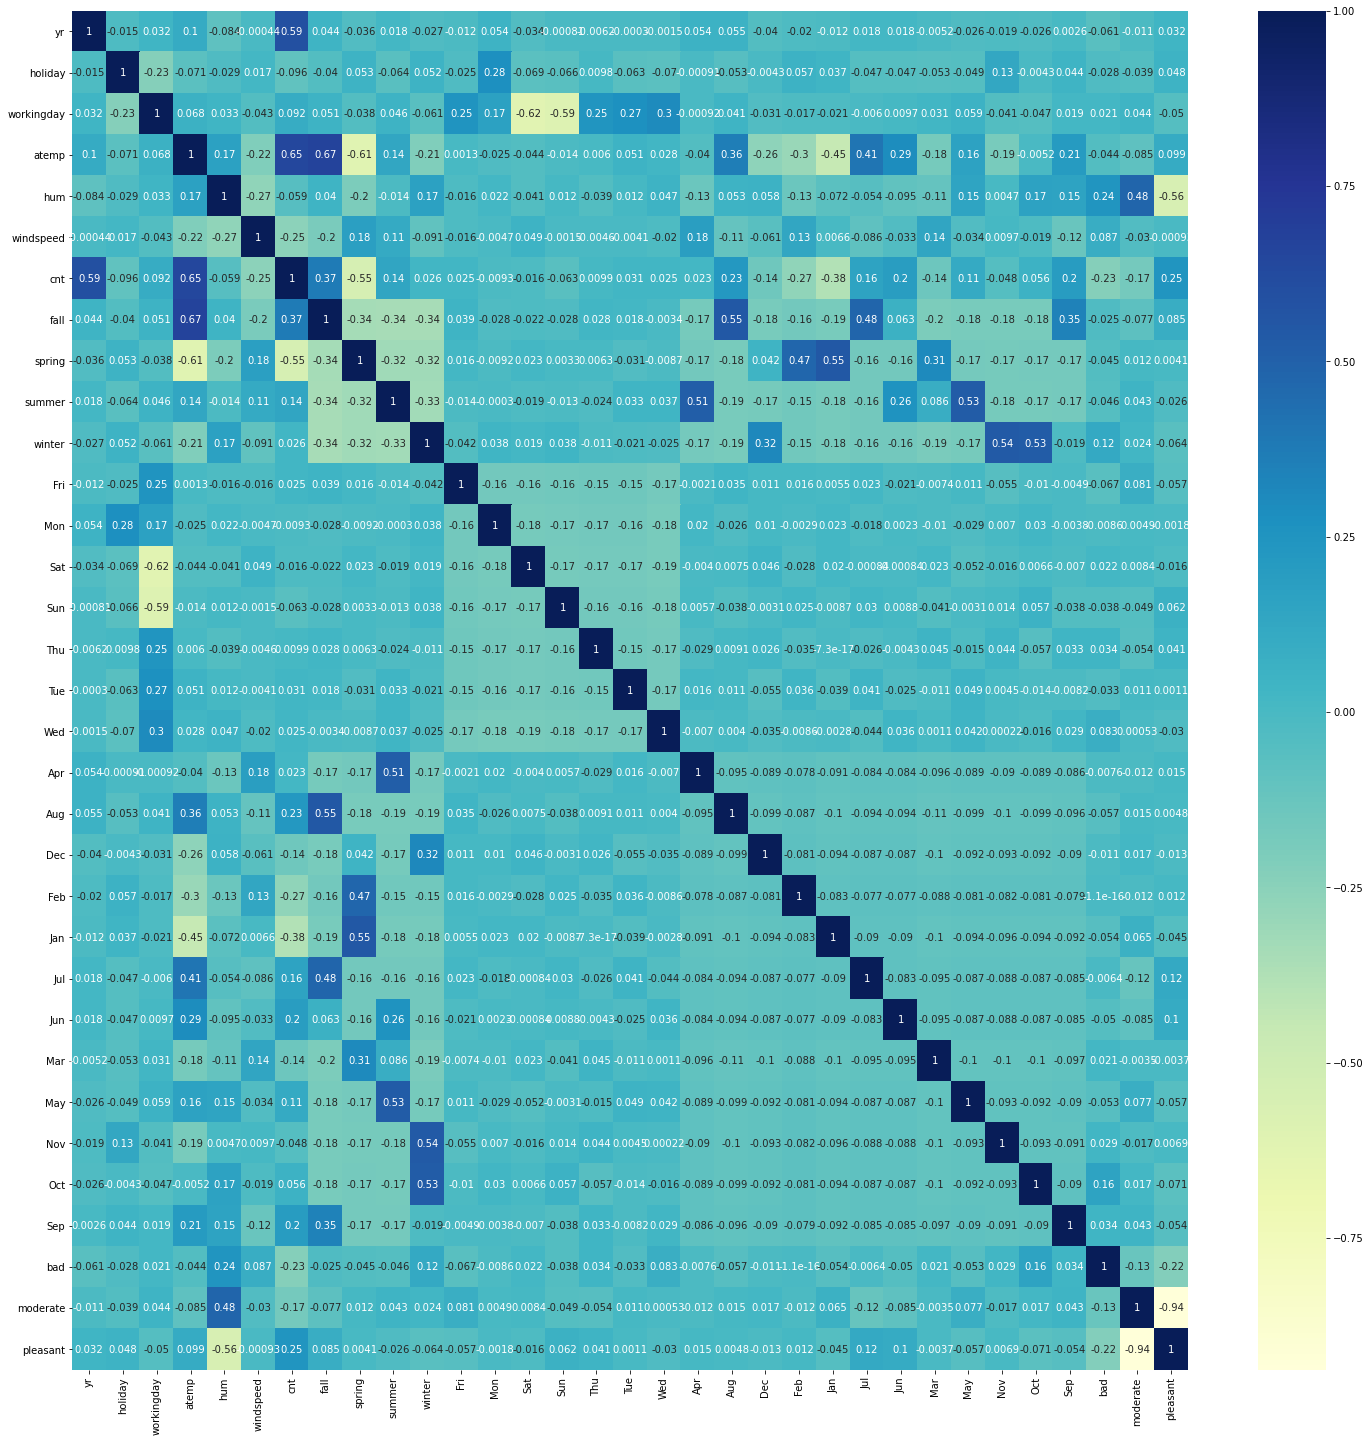

In [77]:
#checking the correlation amongst all the variables by using heatmap
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu",annot_kws={"fontsize":10})
plt.show()

### Observations :

**Let's first check the correlation of other variables with target variable 'cnt':**

- 'cnt' has good positive correlation with 'pleasant' as people prefer pleasant weather to go out.

- 'cnt' has good negative correlation wtth 'bad' weather as people don't prefer bad weather when going out.

- 'cnt' has good positive correlation with 'June','July','August','September','October' months as it is end of summer and start of fall season.

- 'cnt' has highest positive correlation with temparature and year, as people are more preferring to go out in warm temperatues and also the year 2019 has more bookings as we saw in previous analysis.

- 'cnt' has highest negative correlation with spring as people aren't preferring this due to bad weather.

**Looking at the correlations amongst the independent variables, we can see some obvious correlations:**

- There is high correlation between the months and seasons like Jan,Feb with Spring or May and Summer as they the same time of the year.
- There's a high negative correlation between Jan and Temperature as they temperatures in January are usually less.
- High positive correlation between Fall and temparature as Fall has higher temperatures.
- These correlations suggest that having both of the correlated variables will make the model with high Variannce Inflation which would lead to bad model. Hence none of the hightly correlated independent variables should co-exist in our model which we can verify just for our verification.

**These correlations suggest that having both of the correlated variables will make the model with high Variannce Inflation which would lead to bad model. Hence none of the hightly correlated independent variables should co-exist in our model which we can verify just for our verification.**

# Data Modelling

**Dividing the Train Set into X and Y**

In [78]:
# Popping the target variable from the train set and assigning it to y_train,
# Assigning the remianing dataset to X_train as we will work with all the variables assuming all are predictors.

y_train = df_train.pop('cnt')
X_train = df_train

In [79]:
y_train = pd.DataFrame(y_train)
y_train.shape

(510, 1)

**Feature Selection using RFE(Recursive Feature Elimination)**

In [80]:
#Running RFE with the Output Number of variables equals to 10.
#creating a LinearRegression object
lm = LinearRegression()

In [81]:
#fitting the model
lm.fit(X_train,y_train)

LinearRegression()

In [82]:
#using rfe and specifying number of siginificant variables
rfe = RFE(lm,10)

In [83]:
#fittng the rfe model
rfe = rfe.fit(X_train,y_train)

In [84]:
#listing all the varibles with their rank and whether RFE picked them as one among top 15
sorted(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))

[('Apr', False, 18),
 ('Aug', True, 1),
 ('Dec', False, 12),
 ('Feb', False, 11),
 ('Fri', False, 14),
 ('Jan', False, 8),
 ('Jul', False, 20),
 ('Jun', False, 10),
 ('Mar', False, 23),
 ('May', False, 9),
 ('Mon', False, 16),
 ('Nov', False, 22),
 ('Oct', False, 6),
 ('Sat', False, 3),
 ('Sep', True, 1),
 ('Sun', False, 15),
 ('Thu', False, 19),
 ('Tue', False, 17),
 ('Wed', False, 21),
 ('atemp', True, 1),
 ('bad', True, 1),
 ('fall', False, 13),
 ('holiday', True, 1),
 ('hum', True, 1),
 ('moderate', False, 7),
 ('pleasant', False, 2),
 ('spring', False, 5),
 ('summer', True, 1),
 ('windspeed', True, 1),
 ('winter', True, 1),
 ('workingday', False, 4),
 ('yr', True, 1)]

In [85]:
#preserving the columns picked by rfe
significant = X_train.columns[rfe.support_]
significant

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'summer', 'winter', 'Aug',
       'Sep', 'bad'],
      dtype='object')

**Building model using statsmodel, for the detailed statistics**

In [86]:
# Creating X_train dataframe with RFE significant variables
X_train_rfe = X_train[significant]

In [87]:
# Adding a constant variable from statsmodel api
X_train_rfe = sm.add_constant(X_train_rfe)

In [88]:
X_train_rfe.head(10)

,const,yr,holiday,atemp,hum,windspeed,summer,winter,Aug,Sep,bad
576,1.0,1,0,0.766351,0.725633,0.264686,0,0,0,0,0
426,1.0,1,0,0.438975,0.640189,0.255342,0,0,0,0,0
728,1.0,1,0,0.200348,0.498067,0.663106,0,0,0,0,0
482,1.0,1,0,0.391735,0.504508,0.188475,1,0,0,0,0
111,1.0,0,0,0.318819,0.751824,0.380981,1,0,0,0,0
580,1.0,1,0,0.882350,0.632030,0.462538,0,0,1,0,0
500,1.0,1,0,0.678508,0.719193,0.172431,1,0,0,0,0
479,1.0,1,0,0.513565,0.440962,0.164434,1,0,0,0,0
472,1.0,1,0,0.496135,0.586518,0.270032,1,0,0,0,0
455,1.0,1,0,0.443956,0.696865,0.279394,1,0,0,0,0


In [89]:
#creating an ordinary leas squares object with the training data
lm = sm.OLS(y_train,X_train_rfe)

In [90]:
#fitting the model
model = lm.fit()

In [91]:
#printing the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     240.0
Date:                Wed, 15 Feb 2023   Prob (F-statistic):          1.71e-183
Time:                        22:04:08   Log-Likelihood:                 487.60
No. Observations:                 510   AIC:                            -953.2
Df Residuals:                     499   BIC:                            -906.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2740      0.027     10.311      0.000       0.222       0.326
yr             0.2272      0.008     26.958      0.000       0.211       0.244
holiday       -0.0856      0.027     -3.219      0.001      -0.138      -0.033
atemp          0.5900      0.023     25.160      0.000       0.544       0.636
hum           -0.2901      0.032     -9.051      0.000      -0.353      -0.227
windspeed     -0.1824      0.027     -6.871      0.000      -0.235      -0.130
summer         0.0985      0.011      8.694      0.000       0.076       0.121
winter         0.1446      0.011     13.101      0.000       0.123       0.166
Aug            0.0642      0.017      3.838      0.000       0.031       0.097
Sep            0.1238      0.017      7.367      0.000       0.091       0.157
bad           -0.1836      0.026     -7.077      0.000      -0.235      -0.133
==============================================================================
Omnibus:                       52.532   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.235
Skew:                          -0.561   Prob(JB):                     1.28e-26
Kurtosis:                       5.086   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
#calculating the VIFs to check if there's some varible with very high VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,40.73
3,atemp,1.43
8,Aug,1.40
6,summer,1.38
7,winter,1.31
4,hum,1.26
9,Sep,1.20
5,windspeed,1.17
10,bad,1.11
1,yr,1.02


**We can consider this as the final model with the following stats:**


- The R-squared and Adj. R-squared values are around ~83%.
- The prob(F-statistics) is also very low indicating that this is a good model.
- Among the P-values of various coefficeints, all the values are below 0.05 which is the desired result.
- Also all the VIF values are below 2 which is great.
- Hence, we can go ahaed with the current Model for Prediction and Evaluation.

**NOTE:**

**Now, Removing any variable will either alter the R-squared and Adj. R-squared values or will make P-values above 5%. Thus, We need to now trade off between having 10 predictors.**

In [93]:
#giving readable name to our final train dataset
X_train_final = X_train_rfe

# Residual Analysis of the Train Data

- Let's now check if our residuals from the train data satisfy the assumptions of linear regression.

In [94]:
#predicting the dependent variable 'cnt' from the trained model
y_train_cnt = model.predict(X_train_final)

In [95]:
(y_train['cnt'] - y_train_cnt).shape

(510,)

Text(0.5, 0, 'Errors')

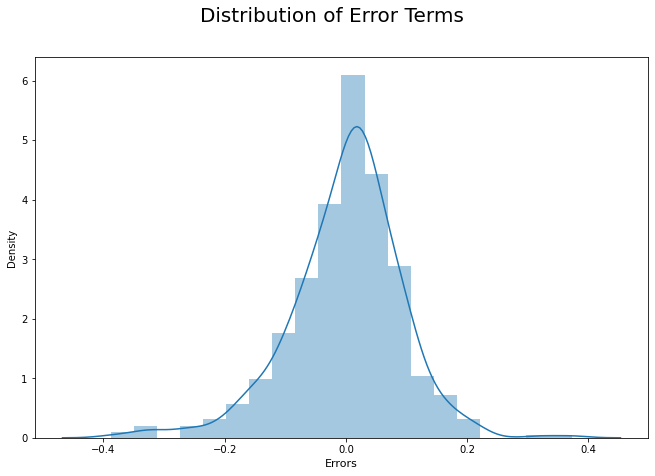

In [96]:
#plotting a histogram with errors on X-axis and density on Y-axis
fig = plt.figure(figsize=(11,7)) #setting the figure size
sns.distplot((y_train['cnt'] - y_train_cnt), bins = 20) #plotting a distribution plot
fig.suptitle('Distribution of Error Terms', fontsize = 20)   #setting the Error Terms             
plt.xlabel('Errors', fontsize = 11) 

Text(0.5, 0, 'Errors')

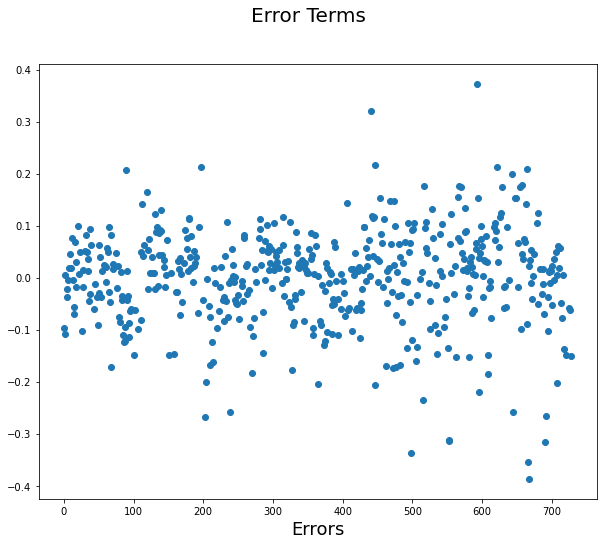

In [97]:
#plotting a scatterplot with the residuals to check the randomness
fig = plt.figure(figsize=(10,8)) #setting the figure size
plt.scatter(y_train.index,(y_train['cnt']-y_train_cnt)) #Plotting scatter plot with the residuals
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)       

### Observations :
- The errors are normally distributed around zero.
- The errors are random and show not trend or dependency.
- The errors are nearly homoscedastic.

# Making Predictions

**Scaling the Test Set**

In [98]:
# Applying scaler to all the columns in the 'Test Data' except for 
#'yes-no' and 'dummy' types as they are already within the range of 0 and 1 inclusive

#capturing the numeric variables from 33 variables
numeric_vars = ['atemp','hum','windspeed','cnt']

#just applying the transform method on the scaler object obtained during rescaling the train data
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

df_test.head(10)

,yr,holiday,workingday,atemp,hum,windspeed,cnt,fall,spring,summer,...,Jul,Jun,Mar,May,Nov,Oct,Sep,bad,moderate,pleasant
184,0,1,0,0.769660,0.657364,0.084219,0.692706,1,0,0,...,1,0,0,0,0,0,0,0,1,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,0,1,...,0,1,0,0,0,0,0,0,0,1
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.741471,0.314298,0.537414,0.569029,0,0,1,...,0,1,0,0,0,0,0,0,0,1
404,1,0,1,0.240105,0.579218,0.326196,0.438104,0,1,0,...,0,0,0,0,0,0,0,0,0,1
198,0,0,1,0.820207,0.671103,0.372990,0.510354,1,0,0,...,1,0,0,0,0,0,0,0,0,1
171,0,0,1,0.733207,0.793903,0.276724,0.553728,1,0,0,...,0,1,0,0,0,0,0,0,1,0
512,1,1,0,0.787883,0.696865,0.331536,0.692706,0,0,1,...,0,0,0,1,0,0,0,0,0,1
200,0,0,1,0.876552,0.728638,0.153738,0.495858,1,0,0,...,1,0,0,0,0,0,0,0,0,1


**Dividing into X_test and y_test**

In [99]:
#removing target variable 'cnt' and assigning it to y_test
y_test = df_test.pop('cnt')

#assigning the remaining dataset to X_test
X_test = df_test

In [100]:
# Keeping only those columns in the X_test which we got in the X_train_final
X_train_temp=X_train_final.drop(['const'],axis=1)
X_test = X_test[X_train_temp.columns]

In [101]:
#adding constant to X_test
X_test = sm.add_constant(X_test)

In [102]:
#predicting y value from X_test
y_pred = model.predict(X_test)

# Model Evaluation

In [103]:
# comparing the r-squared of train and test data.
print(r2_score(y_test,y_pred))
print(r2_score(y_train,y_train_cnt))
print(r2_score(y_train,y_train_cnt)-r2_score(y_test,y_pred))

0.8084769131197939
0.8278885365281274
0.019411623408333578


##  We can say it is a good model as the difference is 1.9% that is ~2% which is not too high difference. 

Text(0.5, 0, 'Errors')

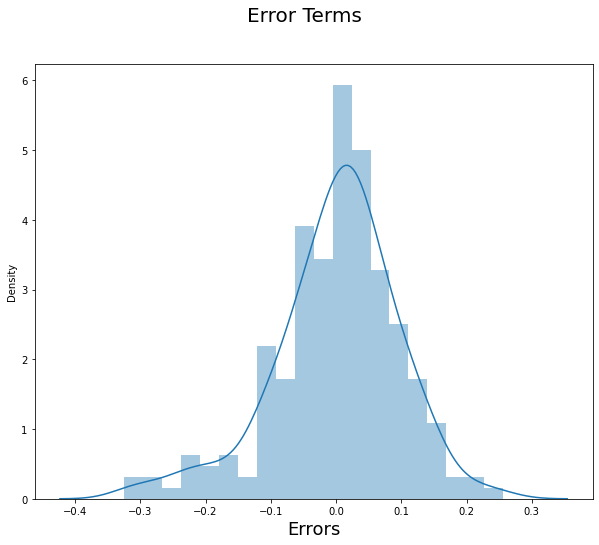

In [104]:
#plotting a histogram with errors on X-axis and density on Y-axis
fig = plt.figure(figsize=(10,8)) #setting the figure size
sns.distplot((y_test - y_pred), bins = 20) #plotting a distribution plot
fig.suptitle('Error Terms', fontsize = 20)   #setting the Error Terms             
plt.xlabel('Errors', fontsize = 18)   

Text(0.5, 0, 'Errors')

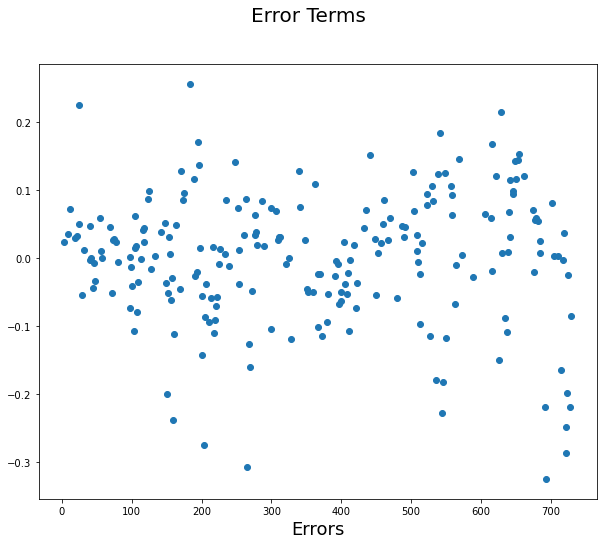

In [105]:
#plotting a scatterplot with the residuals to check the randomness

fig = plt.figure(figsize=(10,8)) #setting the figure size
plt.scatter(y_test.index,(y_test-y_pred)) #Plotting scatter plot with the residuals
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)    

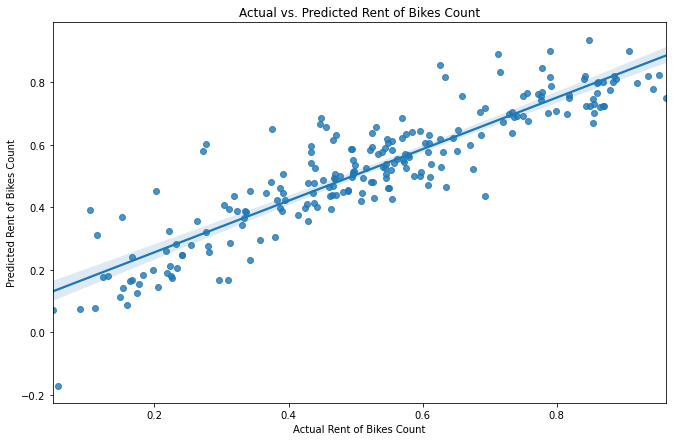

In [106]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize=(11,7)) #setting the figure size
sns.regplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Rent of Bikes Count') # Plot-heading
plt.xlabel('Actual Rent of Bikes Count') # X-label
plt.ylabel('Predicted Rent of Bikes Count') # Y-label
plt.show()

## Observations :
- The errors in case of test data are also normally distributed around the mean 0.
- The errors are random and show no trend or dependency.
- The errors are nearly homoscedastic.
- The y_pred and y_test are pretty close.

# Finding Equation Of Best Fit Line

In [107]:
Cofficients = round(model.params,2)
tempFN = Cofficients.sort_values(ascending = False)
tempFN

atemp        0.59
const        0.27
yr           0.23
winter       0.14
Sep          0.12
summer       0.10
Aug          0.06
holiday     -0.09
bad         -0.18
windspeed   -0.18
hum         -0.29
dtype: float64

In [108]:
for i in range(0, len(tempFN)):
    print(tempFN[i],'*',tempFN.index[i],end ='')
    print(' + ',end ='')

0.59 * atemp + 0.27 * const + 0.23 * yr + 0.14 * winter + 0.12 * Sep + 0.1 * summer + 0.06 * Aug + -0.09 * holiday + -0.18 * bad + -0.18 * windspeed + -0.29 * hum + 

# Insights:

- Temperature is the Most Significant Feature which affects the Business positively, Whereas the other Environmental condition such as Raining, Humidity, Windspeed and Cloudy affects the Business negatively. 

- Company need to think how to tackle with bad weather condition and come up with sort of solution which protect users from Raining.

- The Demand of Bikes is more in the Winter and Summer season, mostly user don't like to travel using Bikes in Rainy Day or Rainy Season.

- Demand of Bike Rent has been significantly increased in the 2019 than 2018 so it is clear sign that Boom Bikes is doing a Business.

- Even though without expending a single cent BOOM Bikes can expect their business to grow by 27%.

**The top variables which are significant in our model are :**
- Temperature
- Year
- Winter
- Sep
- Summer
- Aug
- Holiday
- Bad Weather
- Windspeed
- Humidity